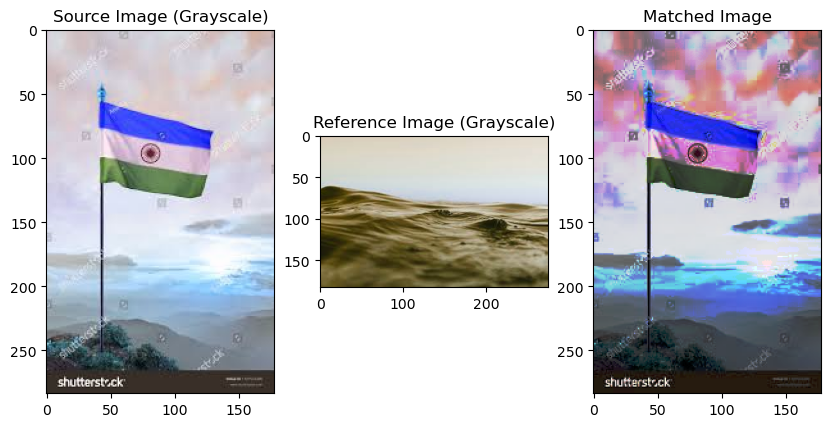

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def hist_match(source, reference):

    src_hist, bins = np.histogram(source.flatten(), 256, [0, 256])
    ref_hist, _ = np.histogram(reference.flatten(), 256, [0, 256])

    src_cdf = np.cumsum(src_hist) / src_hist.sum()
    ref_cdf = np.cumsum(ref_hist) / ref_hist.sum()
    mapping = np.interp(src_cdf, ref_cdf, np.arange(256))

    matched_image = np.interp(source.flatten(), np.arange(256), mapping).reshape(source.shape)
    return np.uint8(matched_image)


source_image = cv2.imread('india.jpeg')
reference_image = cv2.imread('ocean.jpeg')


# Convert both images to grayscale
#source_image_gray = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
#reference_image_gray = cv2.cvtColor(reference_image, cv2.COLOR_BGR2GRAY)
# Perform histogram matching
result_image = hist_match(source_image, reference_image)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Source Image (Grayscale)')
plt.imshow(source_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.title('Reference Image (Grayscale)')
plt.imshow(reference_image, cmap='gray')
plt.subplot(1, 3, 3)
plt.title('Matched Image')
plt.imshow(result_image, cmap='gray')
plt.show()


In [ ]:
import cv2 
import numpy as np 
image = cv2.imread('peacock.webp') 
image = cv2.resize(image,(400,400))
cv2.imshow('Original Image', image) 
cv2.waitKey(0) 
# Gaussian Blur 
Gaussian = cv2.GaussianBlur(image, (7, 7), 0) 
cv2.imshow('Gaussian Blurring', Gaussian) 
cv2.waitKey(0) 
# Median Blur 
median = cv2.medianBlur(image, 5) 
cv2.imshow('Median Blurring', median) 
cv2.waitKey(0) 


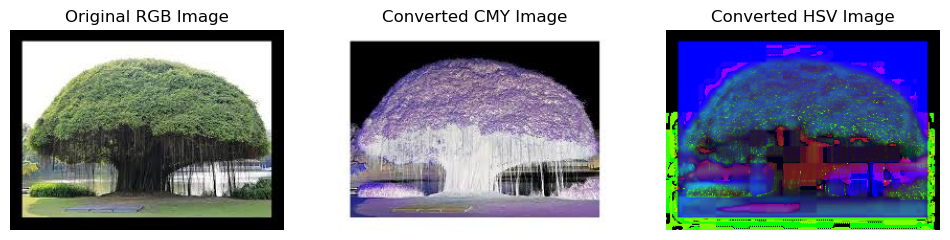

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the input image in RGB format
image = cv2.imread('tree.jpeg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Convert RGB to CMY (Cyan, Magenta, Yellow)
# RGB values should be between 0 and 255, so first normalize them to range [0, 1]
image_rgb_normalized = image_rgb / 255.0

# Apply the CMY conversion formula
image_cmy = 1 - image_rgb_normalized
image_cmy = np.clip(image_cmy, 0, 1)  # Ensure values stay between 0 and 1

# Convert RGB to HSV using OpenCV
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Plot the results
plt.figure(figsize=(12, 12))

# Display original RGB image
plt.subplot(1, 3, 1)
plt.imshow(image_rgb)
plt.title('Original RGB Image')
plt.axis('off')
# Display CMY image
plt.subplot(1, 3, 2)
plt.imshow(image_cmy)
plt.title('Converted CMY Image')
plt.axis('off')
# Display HSV image
plt.subplot(1, 3, 3)
plt.imshow(image_hsv)
plt.title('Converted HSV Image')
plt.axis('off')
plt.show()


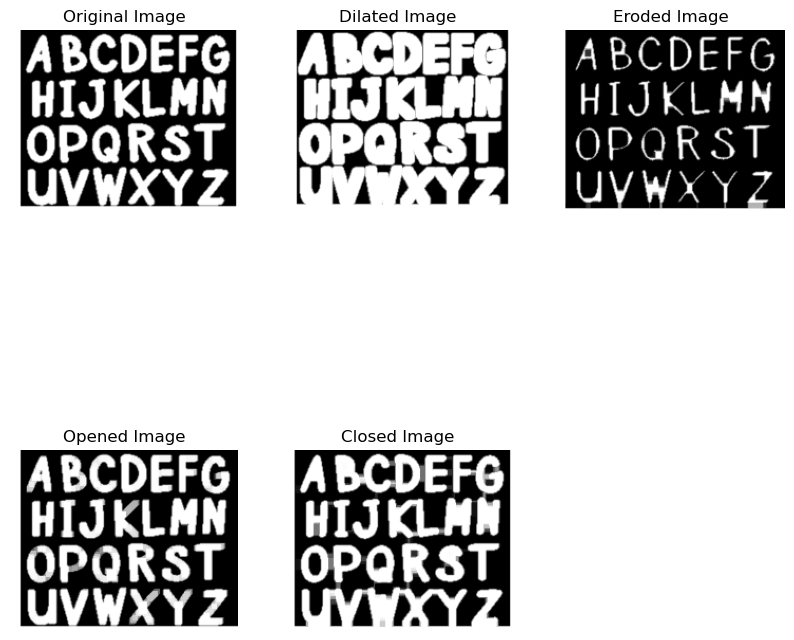

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('abcd.png', 0)  # Grayscale image

# Define a kernel (structuring element) for morphological operations
kernel = np.ones((5, 5), np.uint8)

# Dilation: Adds pixels to the boundary of objects
dilated_image = cv2.dilate(image, kernel, iterations=1)

# Erosion: Removes pixels from the boundary of objects
eroded_image = cv2.erode(image, kernel, iterations=1)

# Opening: Erosion followed by Dilation (removes small noise)
opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

# Closing: Dilation followed by Erosion (fills small holes)
closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)

# Plot the results using matplotlib
plt.figure(figsize=(10, 10))

# Display original image
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Display dilated image
plt.subplot(2, 3, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Dilated Image')
plt.axis('off')

# Display eroded image
plt.subplot(2, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

# Display opened image
plt.subplot(2, 3, 4)
plt.imshow(opened_image, cmap='gray')
plt.title('Opened Image')
plt.axis('off')

# Display closed image
plt.subplot(2, 3, 5)
plt.imshow(closed_image, cmap='gray')
plt.title('Closed Image')
plt.axis('off')
plt.show()

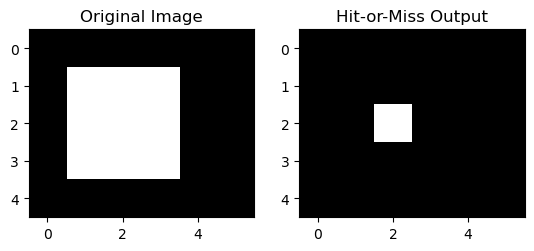

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_hit_or_miss
# Define a binary image as a NumPy array
image = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 1, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0]
], dtype=np.uint8)
# Define a structuring element (SE)
struct_element = np.array([
    [-1,  1, -1],
    [ 1, -1,  1],
    [-1,  1, -1]
])
# Apply Hit-or-Miss transformation
hit_miss_result = binary_hit_or_miss(image, structure1=(struct_element == 1), structure2=(struct_element == 0))
# Convert result to 255 (white) for better visualization
hit_miss_result = hit_miss_result.astype(np.uint8) * 255




# Display Results
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray', vmin=0, vmax=1)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(hit_miss_result, cmap='gray', vmin=0, vmax=255)
plt.title("Hit-or-Miss Output")
plt.show()


In [12]:
import cv2

# Load the image
image = cv2.imread('peacock.webp')  # Replace with your image path
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise
blur = cv2.GaussianBlur(gray, (5, 5), 1.4)

# Apply Canny Edge Detection
edges = cv2.Canny(blur, threshold1=100, threshold2=200)

# Display results
cv2.imshow('Original Image', image)
cv2.imshow('Canny Edges', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


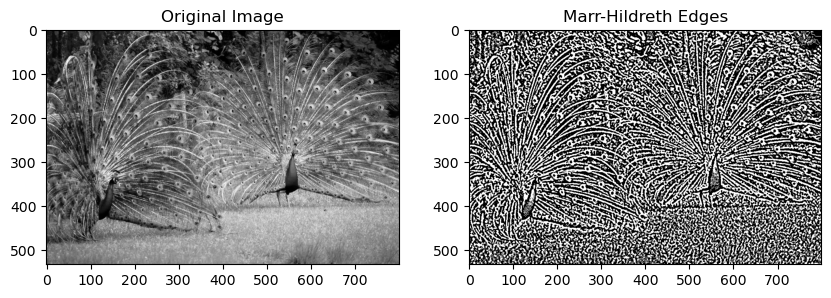

In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load image in grayscale
image = cv2.imread('peacock.webp', cv2.IMREAD_GRAYSCALE)
# Apply Gaussian Blur to smooth noise
blurred = cv2.GaussianBlur(image, (7, 7), 1.5)  # Larger kernel for better noise removal
# Compute the Laplacian (second derivative)
laplacian = cv2.Laplacian(blurred, cv2.CV_64F)
# Detect Zero-Crossings (Edge Detection)
edges = np.uint8((laplacian < 0) * 255)  # Convert zero-crossings to binary edges
# Display results
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1), plt.imshow(image, cmap='gray'), plt.title("Original Image")
plt.subplot(1, 2, 2), plt.imshow(edges, cmap='gray'), plt.title("Marr-Hildreth Edges")
plt.show()



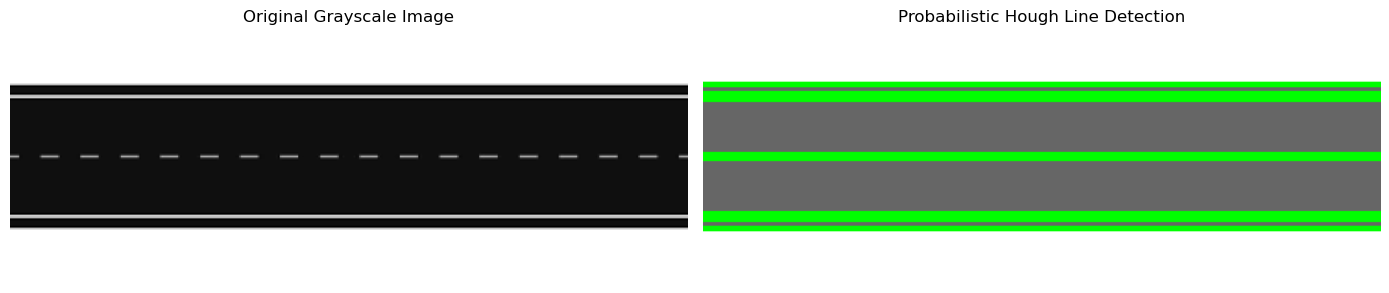

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image (convert to grayscale)
image = cv2.imread('road.png', cv2.IMREAD_GRAYSCALE)
# Step 1: Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(image, (5, 5), 0)
# Step 2: Apply Canny edge detection
edges = cv2.Canny(blurred, 50, 150, apertureSize=3)
# Step 3: Apply Probabilistic Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=80, minLineLength=50, maxLineGap=10)
# Step 4: Convert grayscale image to BGR to draw colored lines
image_with_lines = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
# Step 5: Draw the detected lines
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(image_with_lines, (x1, y1), (x2, y2), (0, 255, 0), 2)





# Step 6: Display both original and result side by side
plt.figure(figsize=(14, 6))
# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')
# Image with lines
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_lines, cv2.COLOR_BGR2RGB))
plt.title('Probabilistic Hough Line Detection')
plt.axis('off')
plt.tight_layout()
plt.show()


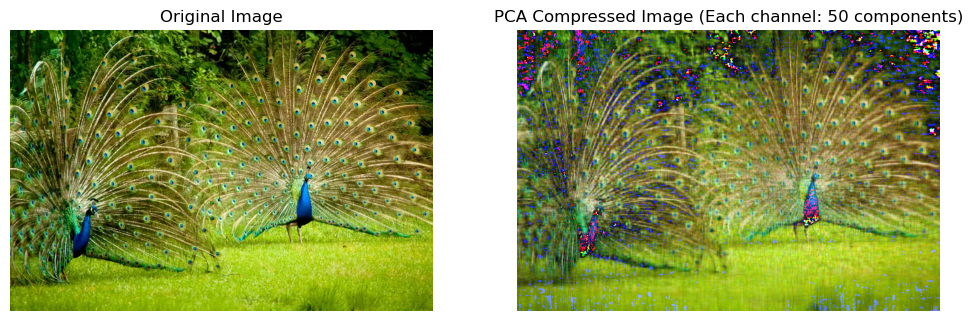

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
# Load color image
image = cv2.imread("peacock.webp")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
# Normalize image
image = image / 255.0
# Apply PCA on each channel separately
compressed_channels = []
n_components = 50  # Adjust as needed
for i in range(3):  # R, G, B channels
    pca = PCA(n_components=n_components)
    channel = image[:, :, i]
    transformed = pca.fit_transform(channel)
    reconstructed = pca.inverse_transform(transformed)
    compressed_channels.append(reconstructed)




reconstructed_image = np.stack(compressed_channels, axis=2)
# Rescale to 0–255 and convert to uint8
reconstructed_image = (reconstructed_image * 255).astype(np.uint8)
# Display the original and compressed images
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow((image * 255).astype(np.uint8))
axes[0].set_title("Original Image")
axes[0].axis("off")
axes[1].imshow(reconstructed_image)
axes[1].set_title(f"PCA Compressed Image (Each channel: {n_components} components)")
axes[1].axis("off")
plt.show()


In [16]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
# Load the digits dataset
digits = load_digits()
# Features and labels
X = digits.data
y = digits.target
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()
# Train the model
gnb.fit(X_train, y_train)
# Predict on the test data
y_pred = gnb.predict(X_test)






# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Naive Bayes classifier on Digits dataset: {:.2f}%".format(accuracy * 100))


Accuracy of Naive Bayes classifier on Digits dataset: 84.72%


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


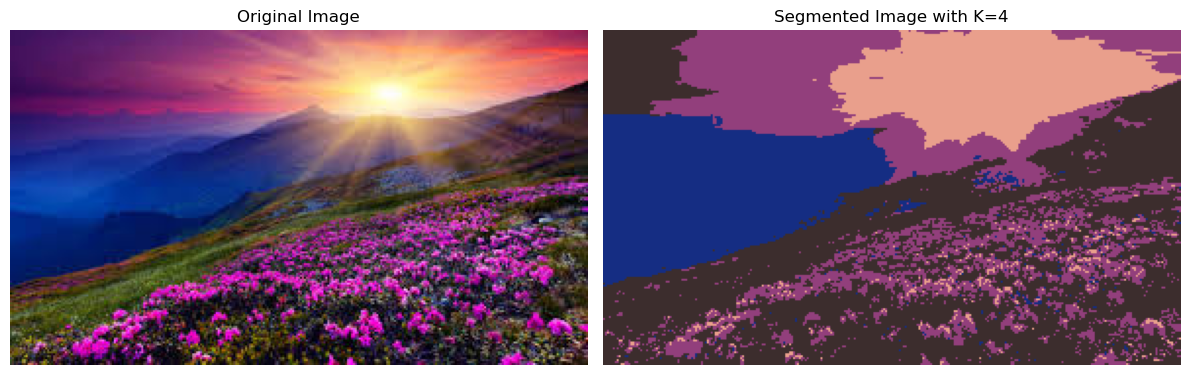

In [19]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('land.jpeg')  # Replace with your image path
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
# Reshape the image to a 2D array of pixels (each pixel = [R,G,B])
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
# Define the number of clusters (K)
k = 4  # You can change this number
kmeans = KMeans(n_clusters=k, random_state=42)
labels = kmeans.fit_predict(pixel_values)
# Get the cluster centers (colors)
centers = np.uint8(kmeans.cluster_centers_)
# Map each pixel to the centroid color
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(image.shape)
# Plot original and segmented images



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title(f'Segmented Image with K={k}')
plt.imshow(segmented_image)
plt.axis('off')
plt.tight_layout()
plt.show()


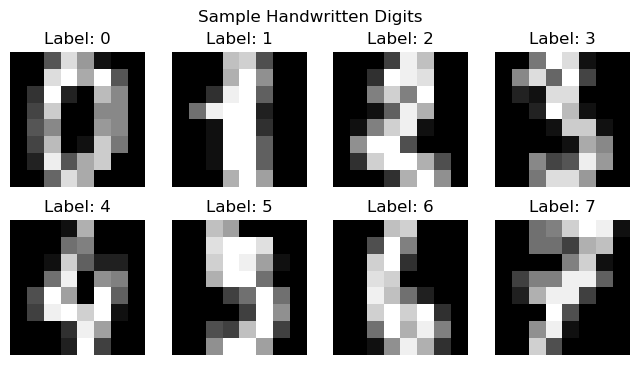

Accuracy: 84.72%


In [20]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
# Load handwritten digits dataset (0 to 9)
digits = load_digits()
# Display some sample digits
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f'Label: {digits.target[i]}')
    plt.axis('off')
plt.suptitle("Sample Handwritten Digits")
plt.show()
# Prepare data
X = digits.data  # Flattened 8x8 images (64 features)
y = digits.target





# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a Naive Bayes model
model = GaussianNB()
# Train the model
model.fit(X_train, y_train)
# Predict on test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
